In [61]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [62]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [63]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [64]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None ):


    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", s = 4,  label = "Training data")
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

    plt.legend(prop = {"size" : 14})

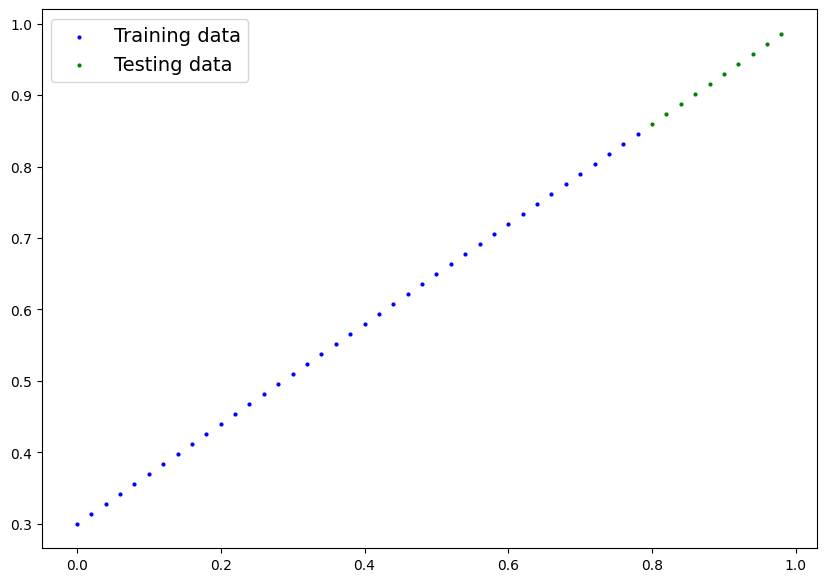

In [65]:
plot_predictions()

In [66]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [67]:
torch.manual_seed(57)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.1446], requires_grad=True),
 Parameter containing:
 tensor([-0.1165], requires_grad=True)]

In [68]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.1446])), ('bias', tensor([-0.1165]))])

In [69]:
with torch.inference_mode():  ##Or we can use with torch.no_grad(): 
    y_preds = model_0(X_test)

In [70]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.0008],
        [ 0.0021],
        [ 0.0050],
        [ 0.0079],
        [ 0.0108],
        [ 0.0136],
        [ 0.0165],
        [ 0.0194],
        [ 0.0223],
        [ 0.0252]])


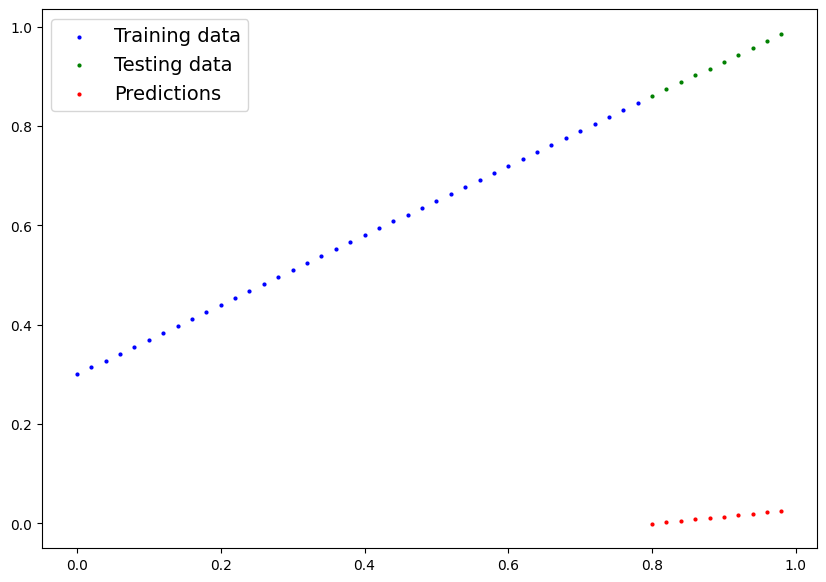

In [71]:
plot_predictions(predictions=y_preds)

In [72]:
loss_function = nn.L1Loss()

learning_rate = 0.01
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)

In [76]:
epochs = 350

train_loss_values = []
test_loss_values = []
epoch_counts = []


for epoch in range(epochs):
    
    model_0.train()
    y_pred = model_0(X_train)

    loss = loss_function(y_pred, y_train)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_function(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
        epoch_counts.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.03289099410176277 | MAE Test Loss: 0.07608410716056824 
Epoch: 10 | MAE Train Loss: 0.029452193528413773 | MAE Test Loss: 0.06781156361103058 
Epoch: 20 | MAE Train Loss: 0.026021722704172134 | MAE Test Loss: 0.060225896537303925 
Epoch: 30 | MAE Train Loss: 0.022587373852729797 | MAE Test Loss: 0.05195336416363716 
Epoch: 40 | MAE Train Loss: 0.0191485695540905 | MAE Test Loss: 0.043680816888809204 
Epoch: 50 | MAE Train Loss: 0.015719790011644363 | MAE Test Loss: 0.036095160990953445 
Epoch: 60 | MAE Train Loss: 0.01228375919163227 | MAE Test Loss: 0.027822619304060936 
Epoch: 70 | MAE Train Loss: 0.008846299722790718 | MAE Test Loss: 0.020236963406205177 
Epoch: 80 | MAE Train Loss: 0.005417859647423029 | MAE Test Loss: 0.011964422650635242 
Epoch: 90 | MAE Train Loss: 0.002007963601499796 | MAE Test Loss: 0.0051191747188568115 
Epoch: 100 | MAE Train Loss: 0.0027762926183640957 | MAE Test Loss: 0.013553649187088013 
Epoch: 110 | MAE Train Loss: 0.002776

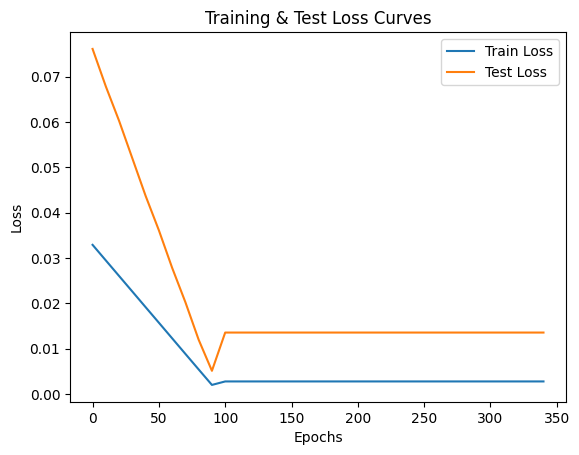

In [77]:
plt.plot(epoch_counts, train_loss_values, label = "Train Loss")
plt.plot(epoch_counts, test_loss_values, label = "Test Loss")
plt.title("Training & Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [78]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6943])), ('bias', tensor([0.3050]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [79]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8604],
        [0.8743],
        [0.8882],
        [0.9021],
        [0.9160],
        [0.9299],
        [0.9437],
        [0.9576],
        [0.9715],
        [0.9854]])

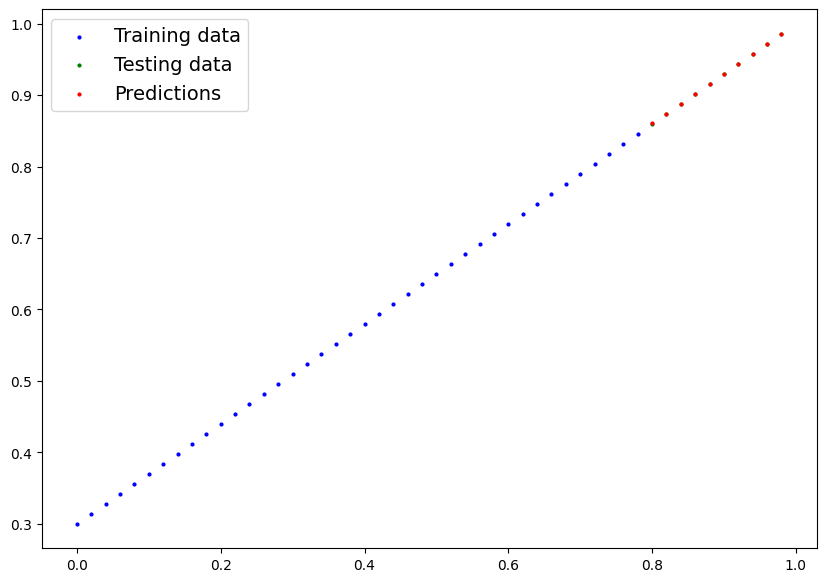

In [81]:
plot_predictions(predictions=y_preds)

In [82]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH  / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


In [83]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [84]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds  = loaded_model_0(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])